# IMPORTANDO LAS PRINCIPALES LIBRERIAS 

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

C:\Users\YERIMEN\Anaconda3\envs\Ambiente_Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### importacion de los datos 

In [3]:
data=pd.read_csv('D://UniversalBank.csv',header=0,sep=";")
data.head(6)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


### Analisis exploratorio de los datos :

In [10]:
data['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [11]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [12]:
data['CD_Account'].value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [13]:
data['Securities_Account'].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [14]:
data.groupby('Personal_Loan').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


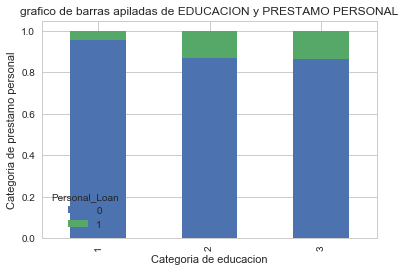

In [7]:
table=pd.crosstab(data.Education,data.Personal_Loan)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('grafico de barras apiladas de EDUCACION y PRESTAMO PERSONAL')
plt.xlabel('Categoria de educacion')
plt.ylabel('Categoria de prestamo personal')
plt.savefig('ba_edu_per')

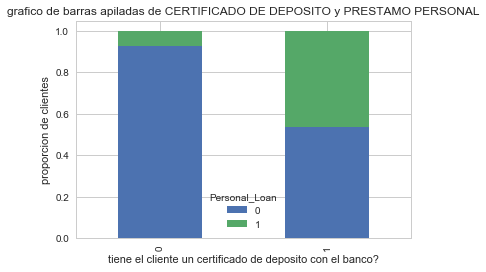

In [8]:
table=pd.crosstab(data.CD_Account,data.Personal_Loan)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('grafico de barras apiladas de CERTIFICADO DE DEPOSITO y PRESTAMO PERSONAL')
plt.xlabel('tiene el cliente un certificado de deposito con el banco?')
plt.ylabel('proporcion de clientes')
plt.savefig('ba_cd_per')


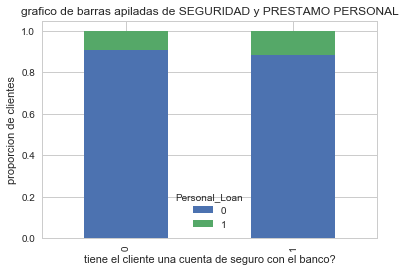

In [9]:
table=pd.crosstab(data.Securities_Account,data.Personal_Loan)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('grafico de barras apiladas de SEGURIDAD y PRESTAMO PERSONAL')
plt.xlabel('tiene el cliente una cuenta de seguro con el banco?')
plt.ylabel('proporcion de clientes')
plt.savefig('ba_seg_per')

### Test chi cguadrado

In [17]:
import scipy
scipy.stats.chi2_contingency(pd.crosstab(data["Personal_Loan"],data["Education"]))

(111.2398718738913,
 6.991473868665428e-25,
 2,
 array([[1894.784, 1268.312, 1356.904],
        [ 201.216,  134.688,  144.096]]))

In [18]:
scipy.stats.chi2_contingency(pd.crosstab(data["Personal_Loan"],data["CD_Account"]))
 #X-squared = 495.9, df = 1, p-value < 2.2e-16


(495.90424218782334, 7.398297503329848e-110, 1, array([[4246.992,  273.008],
        [ 451.008,   28.992]]))

In [19]:
scipy.stats.chi2_contingency(pd.crosstab(data["Personal_Loan"],data["Securities_Account"]))
#X-squared = 2.1723, df = 1, p-value = 0.1405


(2.172310545186504, 0.14051497326319357, 1, array([[4048.112,  471.888],
        [ 429.888,   50.112]]))

### Revision de los valores perdidos :

In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Vemos como se esta distribuyendo la target : 

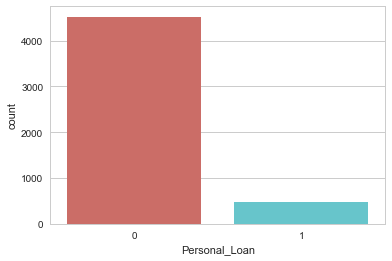

<Figure size 432x288 with 0 Axes>

In [4]:
sns.countplot(x='Personal_Loan',data=data,palette='hls')
plt.show()
plt.savefig('coun_plot')

### Creacion de las variables dummy : 

In [5]:
cat_vars=['Education','Securities_Account','CD_Account','Online','CreditCard']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(data[var],prefix=var)
    data1=data.join(cat_list)
    data=data1

In [6]:
cat_vars=['Education','Securities_Account','CD_Account','Online','CreditCard']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final4=data[to_keep]
data_final4.columns.values

data_final4_vars=data_final4.columns.values.tolist()
y=['Personal_Loan']
x=[i for i in data_final4_vars if i not in y]

In [7]:
data_final4.head(4)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Mortgage,Personal_Loan,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,1,0,1,0,1,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,1,0,1,0,1,0
2,3,39,15,11,94720,1,1.0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,4,35,9,100,94112,1,2.7,0,0,0,1,0,1,0,1,0,1,0,1,0


### Seleccion de variables : 

In [8]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [9]:
rfe=RFE(logreg,18)
rfe=rfe.fit(data_final4[x],data_final4[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\YERIMEN\Anaconda3\envs\Ambiente_Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]


In [10]:
cols=['Age','Experience','Income','ZIP_Code','Family','CCAvg','Mortgage','Personal_Loan','Education_1','Education_2','Education_3','Securities_Account_0','Securities_Account_1','CD_Account_0','CD_Account_1','Online_1','CreditCard_0','CreditCard_1']
x=data_final4[cols]
y=data_final4['Personal_Loan']
data_final4.head(15)
x.head(15)
y.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
Name: Personal_Loan, dtype: int64

### implementacion del modelo 

##### OPCION 2

In [11]:
from sklearn.linear_model import LogisticRegression

logisticRegr=LogisticRegression()
result1=logisticRegr.fit(x,y)
result2=logisticRegr.predict_proba(x)
result3=logisticRegr.predict(x)
print(result1.coef_)
print(result1.fit_intercept)
print(result1._estimator_type)
print(result2)

[[ 8.31455491e-03  6.70171628e-03  3.64304839e-02 -7.13476910e-05
   1.17110741e-02  4.94085772e-03  6.65328765e-04  1.50937134e-02
  -8.87497470e-03  4.24365307e-03  4.56736167e-03 -7.09315351e-04
   6.45355398e-04 -3.73622695e-03  3.67226699e-03 -1.54405155e-04
  -1.66377792e-04  1.02417839e-04]]
True
classifier
[[0.98854787 0.01145213]
 [0.99059598 0.00940402]
 [0.99734704 0.00265296]
 ...
 [0.992985   0.007015  ]
 [0.9779704  0.0220296 ]
 [0.96438276 0.03561724]]


### Matriz de confusion : 

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,result3)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y,result3))


[[4384  136]
 [ 322  158]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      4520
          1       0.54      0.33      0.41       480

avg / total       0.89      0.91      0.90      5000



### Curva ROC 

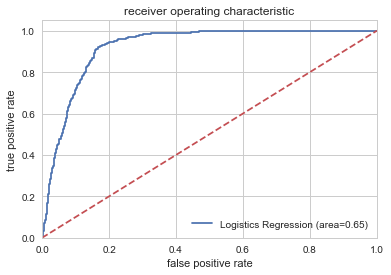

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y,logisticRegr.predict(x))
fpr,tpr,thresholds=roc_curve(y,logisticRegr.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistics Regression (area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('log_ROC')
plt.show()